In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Seprating the features and target

In [ ]:
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
print(X_train_std)

[[-1.13796489 -0.07971099 -3.5556072  ...  0.02825037 -0.98159708
  -0.7885233 ]
 [ 0.64067858 -0.52091877  0.02549599 ... -0.17184452 -1.03823795
   0.31879426]
 [-0.84152431  2.12632792 -0.48609018 ... -0.25938604 -0.21545477
   2.19271628]
 ...
 [ 2.12288146 -1.15121561  0.23013046 ... -0.25938604 -0.50760242
   0.14843771]
 [ 0.04779742 -0.30031488  0.43476492 ...  0.90366551 -0.69839272
   0.40397253]
 [-1.13796489 -1.11970076 -0.07682125 ...  0.45345201 -0.69243053
  -0.70334503]]


Building the Neural Network

In [ ]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#Setting up the layers of Neural
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(8,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
#compiling the Neural Networks
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Neural Network
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6128 - loss: 0.7166 - val_accuracy: 0.7419 - val_loss: 0.5772
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6396 - loss: 0.6665 - val_accuracy: 0.8065 - val_loss: 0.5471
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6736 - loss: 0.6313 - val_accuracy: 0.7903 - val_loss: 0.5241
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6895 - loss: 0.6038 - val_accuracy: 0.7903 - val_loss: 0.5061
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7172 - loss: 0.5820 - val_accuracy: 0.7742 - val_loss: 0.4917
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7314 - loss: 0.5646 - val_accuracy: 0.7742 - val_loss: 0.4801
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7459 - loss: 0.5506 - val_accuracy: 0.7581 - val_loss: 0.4705
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7476 - loss: 0.5392 - val_accuracy: 0.7742 - val_loss

Visualizing accuracy and loss

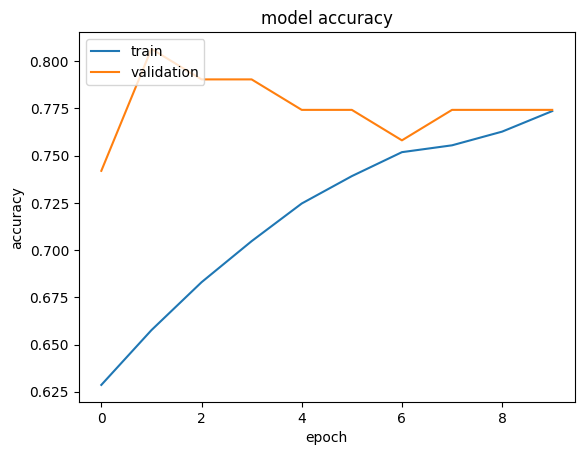

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

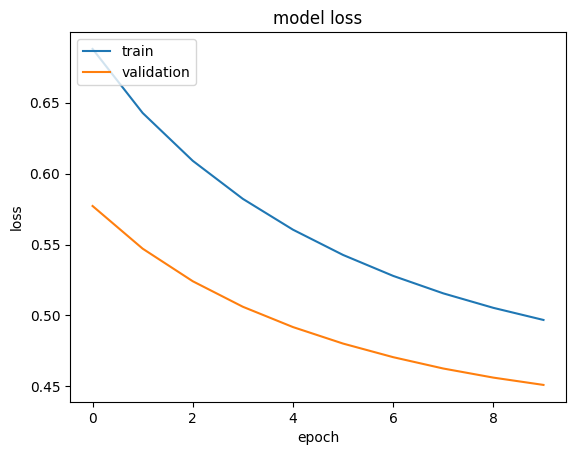

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print('Test accuracy:', accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7541 - loss: 0.5209
Test accuracy: 0.7532467246055603


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(154, 8)
[-0.24864315 -0.48940393  0.12781322 -1.29075209 -0.70188945 -0.79714106
 -0.78484458 -0.53298848]


In [ ]:
Y_pred = model.predict(X_test_std)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(154, 2)
[0.6013603  0.34044364]


In [ ]:
print(X_test_std)

[[-0.24864315 -0.48940393  0.12781322 ... -0.79714106 -0.78484458
  -0.53298848]
 [-0.24864315 -0.26880004 -1.30462805 ... -1.2223427  -0.98457818
  -0.95887985]
 [ 0.344238    0.80270457  0.43476492 ...  0.19082747 -0.7520525
   2.70378593]
 ...
 [-0.54508373 -0.36334457  0.23013046 ...  0.02825037  0.67887478
  -0.53298848]
 [-0.54508373 -1.27727497  0.12781322 ... -0.25938604  0.22872891
  -0.70334503]
 [ 2.71576261 -0.48940393  0.12781322 ...  0.55349946 -0.87129644
   1.00022045]]


In [ ]:
print(Y_pred)

[[0.6013603  0.34044364]
 [0.5538106  0.18546107]
 [0.3557595  0.31119198]
 [0.37564862 0.52527714]
 [0.5134104  0.23003693]
 [0.75331676 0.26678216]
 [0.7694891  0.42697442]
 [0.33065435 0.30168033]
 [0.42443573 0.33234712]
 [0.33526358 0.48169369]
 [0.13144381 0.7549614 ]
 [0.38973597 0.29627573]
 [0.3555969  0.2610183 ]
 [0.28550097 0.55322695]
 [0.29614323 0.22531421]
 [0.24385451 0.17526092]
 [0.519842   0.25988144]
 [0.48719847 0.25276822]
 [0.7155196  0.24236265]
 [0.5133492  0.31896582]
 [0.3614941  0.21213444]
 [0.3968623  0.07385571]
 [0.40507552 0.4504493 ]
 [0.46272364 0.07816937]
 [0.59475714 0.04642006]
 [0.660531   0.46279672]
 [0.33966777 0.04687857]
 [0.14288239 0.5362913 ]
 [0.41771135 0.35010517]
 [0.34311208 0.37066436]
 [0.35242838 0.22789617]
 [0.70945925 0.38871288]
 [0.72757775 0.3305829 ]
 [0.15340135 0.48335472]
 [0.6460467  0.3458877 ]
 [0.6267028  0.44943228]
 [0.7168268  0.26152992]
 [0.53793305 0.29502723]
 [0.67091125 0.25297722]
 [0.70039946 0.26901308]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
# argmax function

my_list = [0.25,0.75]
max_index = np.argmax(my_list)
print(max_index)

1


In [ ]:
# Converting the prediction probability to class Outcomes
Y_pred_Outcomes = [int(np.argmax(i)) for i in Y_pred]
print(Y_pred_Outcomes)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


Building the predictive system

In [ ]:
input_data = (10,168,74,0,0,38,0.537,34)

#change input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_outcomes = [int(np.argmax(i)) for i in prediction]
print(prediction_outcomes)

if (prediction_outcomes[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.15528333 0.46458253]]
[1]
The person is diabetic
